<a href="https://colab.research.google.com/github/jlgjosue/ia-dl-unyleya/blob/master/Tarefa_3_Processamento_de_texto_utilizando_Keras_para_classificar_d%C3%ADgitos_escritos_manualmente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas e datasets utilizados

In [1]:
# import do dataset
from keras.datasets import mnist

Using TensorFlow backend.


Import das clases para o uso da rede Feedforward.

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers.core import Dense, Activation

In [0]:
from keras.utils import np_utils

## Definindo conjunto de testes

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## Reoganizando dados para melhor utilizacao 

In [0]:
X_train = X_train.reshape(60000, 784)

In [0]:
  X_test = X_test.reshape(10000, 784)

## Transformar o conjunto de rótulos individuais para cada entrada

In [0]:
  classes = 10

In [0]:
Y_train = np_utils.to_categorical(Y_train, classes)

In [0]:
Y_test = np_utils.to_categorical(Y_test, classes)

## especificar o tamanho da camada de entrada 

In [0]:
input_size = 784

In [0]:
batch_size = 100

In [0]:
hidden_neurons = 100

In [0]:
epochs = 100

## Difinindo a rede

In [0]:
      model = Sequential([

            Dense(hidden_neurons, input_dim=input_size),

            Activation('sigmoid'),

            Dense(classes),

            Activation('softmax')

       ])

## Especificar de forma simples a função de custo (loss function) e sua otimização

In [0]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

# Realizar o treinamento

In [17]:
model.fit(X_train, Y_train, batch_size = batch_size,nb_epoch=epochs, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.9431 - accuracy: 0.7635
Epoch 2/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.4866 - accuracy: 0.8813
Epoch 3/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.3922 - accuracy: 0.8993
Epoch 4/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.3462 - accuracy: 0.9096
Epoch 5/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.3163 - accuracy: 0.9162
Epoch 6/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2930 - accuracy: 0.9201
Epoch 7/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2766 - accuracy: 0.9243
Epoch 8/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2614 - accuracy: 0.9291
Epoch 9/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2488 - accuracy: 0.9333
Epoch 10/100
60000/60000 [====================

## verificar a acurácia dos dados de teste

In [18]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 0s 26us/step


In [19]:
  print('Test accuracy:', score[1])

Test accuracy: 0.9672999978065491


## verificar o que a rede aprendeu, visuzalizando os pesos das camadas ocultas

In [0]:
weights = model.layers[0].get_weights()

Reoganizando para melhor visualizar os neurônios em matrizes bidimensionais de 28x28 pixels

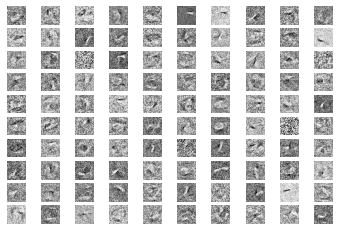

In [22]:
import matplotlib.pyplot as plt

import matplotlib.cm as cm

import numpy

fig = plt.figure()

w = weights[0].T

for neuron in range(hidden_neurons):

    ax = fig.add_subplot(10, 10, neuron + 1)

    ax.axis("off")

    ax.imshow(numpy.reshape(w[neuron], (28, 28)),

    cmap=cm.Greys_r)

plt.savefig("neuron_images.png", dpi=300)

plt.show()